In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
resist="Resistència "
import os

if not os.path.exists("images"):
    os.mkdir("images")
import matplotlib.pyplot as plt
plt.style.use('classic')

In [8]:
#NO ES EL RADI SINO DIAMETRE...
PP=pd.read_csv("Part1.csv",sep=';',decimal=',')
PP["Camp"]=PP["Camp"]
P1=PP.drop([3,4,5,6,7,8,9])
P2=PP.drop([0,1,2,6,7,8,9])
# P2["Camp"]=P2["Camp"]/1000
# P2=pd.read_csv("Part1.csv",sep=';',decimal=',')
# PP=pd.read_csv("p1.csv",sep=';',decimal=',')
# PP2=PP.drop([0,1,2,3,4,5])
# PP1=PP.drop([6,7,8,9])
# P2=PP2
# P1=PP1
# P1.head()


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     711.5
Date:                Mon, 24 May 2021   Prob (F-statistic):             0.0239
Time:                        20:14:33   Log-Likelihood:                 17.581
No. Observations:                   3   AIC:                            -31.16
Df Residuals:                       1   BIC:                            -32.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0043      0.003     -1.659      0.3

/opt/conda/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 3 samples were given.



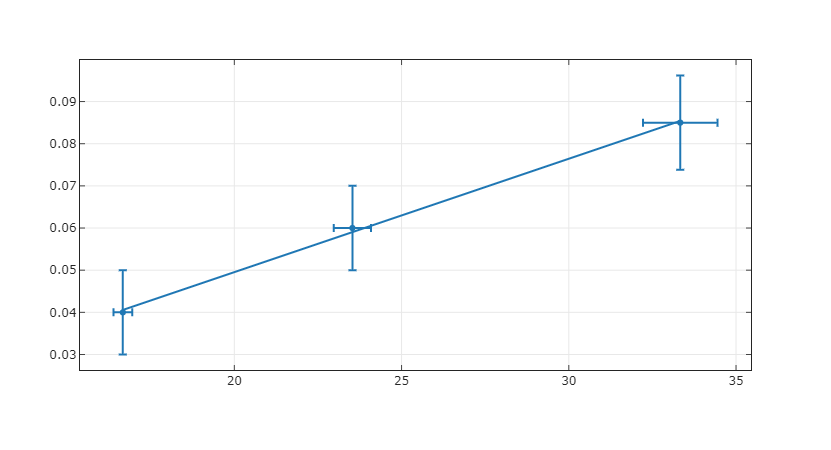

0.0026897260283370605 0.00010083857542628434
0.0013499252337952625 5.0722316667040924e-05


In [9]:
#B en funcio del radi

fig1=px.scatter(x=P1['r^-1'],y=P1['Camp'],template='simple_white',trendline="ols",error_x=P1["Incr"],error_y=P1["IncB"])
   
fig1.update_xaxes(ticks="inside",
                mirror='ticks',showline=True,showgrid=True
                )
fig1.update_yaxes(ticks="inside",
                mirror='ticks',showline=True,showgrid=True

                )
fig1.update_layout(
xaxis_title=r'$r^{-1}\text{ (m)}^{-1}$',
yaxis_title=r'$B\text{ (mT)}$'
)
fig1.write_image("P1.pdf",engine="kaleido")
results = px.get_trendline_results(fig1)
results = results.iloc[0]["px_fit_results"].summary()
print(results)
fit_results = px.get_trendline_results(fig1).px_fit_results.iloc[0]
fig1.show()
m=fit_results.params[1]
um=fit_results.bse[1]
print(m,um)
I=3.985
uI=0.01
mu0=(2*m)/I
umu=np.sqrt(um**2*(2/I)**2+uI**2*(2*m/I**2)**2)
print(mu0,umu)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     867.0
Date:                Mon, 24 May 2021   Prob (F-statistic):             0.0216
Time:                        20:14:33   Log-Likelihood:                 15.974
No. Observations:                   3   AIC:                            -27.95
Df Residuals:                       1   BIC:                            -29.75
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0017      0.003     -0.535      0.6

/opt/conda/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 3 samples were given.



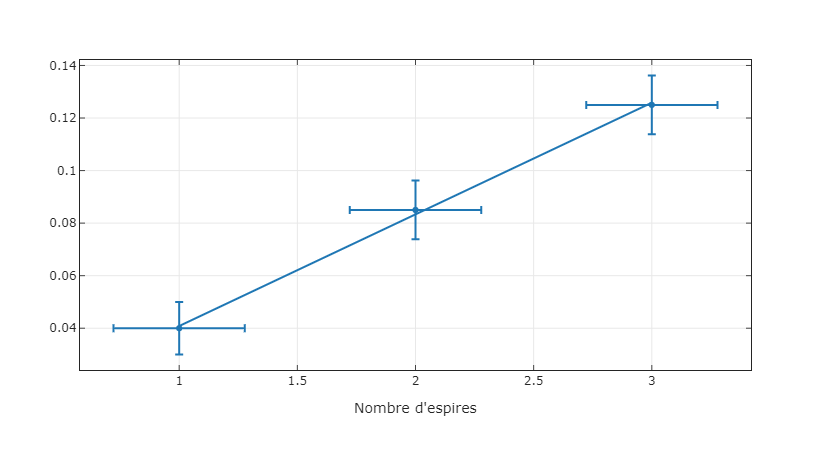

0.042499999999999996 0.0014433756729740677
0.0012814070351758792 0.0007272966484472258


,Radi,Inc,Voltes,Intensitat,IncInt,Camp,IncB,r^-1,Incr
3,0.06,0.001,1.0,3.98,0.01,0.040,0.01000,16.666667,0.277778
4,0.06,0.001,2.0,3.98,0.01,0.085,0.01118,16.666667,0.277778
5,0.06,0.001,3.0,3.98,0.01,0.125,0.01118,16.666667,0.277778


In [10]:
#B en funcio del n de voltes
fig1=px.scatter(x=P2['Voltes'],y=P2['Camp'],template='simple_white',trendline="ols",error_x=P2["Incr"],error_y=P2["IncB"])
#     fig1.show()
   
fig1.update_xaxes(ticks="inside",
                mirror='ticks',showline=True,showgrid=True
                )
fig1.update_yaxes(ticks="inside",
                mirror='ticks',showline=True,showgrid=True

                )
fig1.update_layout(
xaxis_title="Nombre d'espires",
yaxis_title=r'$B\text{ (mT)}$'
)
fig1.write_image("P2.pdf",engine="kaleido")
results = px.get_trendline_results(fig1)
results = results.iloc[0]["px_fit_results"].summary()
print(results)
fit_results = px.get_trendline_results(fig1).px_fit_results.iloc[0]
fig1.show()
m=fit_results.params[1]
um=fit_results.bse[1]
print(m,um)
I=3.98
uI=0.01
mu0=(2*m*0.06)/I
umu=np.sqrt(um**2*(2/I)**2+uI**2*(2*m/I**2)**2)
print(mu0,umu)
P2

!jupyterlab password

In [ ]:
1